In [1]:
# MECA654, March 2018, Pierre Nagorny
# Polytech Annecy-Chambéry, SYMME lab, Savoie Mont Blanc University

from IPython.display import display, HTML, IFrame, Math
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt  # Loading Pyplot
from scipy.interpolate import interp1d
# Setting Matplotlib render backend
%matplotlib nbagg
#%pylab inline
from sympy import *  # Loading Sympy for symbolic calculus
from sympy.physics.vector import *  # Everything needed for vector calculs, Reference frame, dynamic
from sympy.physics.vector import init_vprinting  # To print time varying vectors

init_printing()
init_vprinting(pretty_print=True)

# Display full output in Jupyter Notebook
InteractiveShell.ast_node_interactivity = "all"

## Exercise 10 - Movements composition and acceleration

$(2)$ is an wheel with a $\dot{\theta_{2}} \ (O, \vec{i_{1}})$ constant speed  
$(2)$ has also a $(O, \vec{k_{0}})$ rotation with a $\dot{\theta_{1}}$constant speed  

![Mechanism schematic](./img/k_Ex10.svg)

In [2]:
# Define used symbols for SymPy, constant variables
a, r, t = symbols('a r t')  # the time t is a symbol
# Define dynamic symbols, variables function of time t
theta_1, theta_2, OM = dynamicsymbols('theta_1 theta_2 OM')
theta_1dot = dynamicsymbols('theta_1', 1)  # First order derivative of theta_1
theta_2dot = dynamicsymbols('theta_2', 1)  # First order derivative of theta_2

# Our reference frames for each body:
B0 = ReferenceFrame('B0', indices=['i', 'j', 'k'])
B1 = ReferenceFrame('B1', indices=['i', 'j', 'k'])
B2 = ReferenceFrame('B1', indices=['i', 'j', 'k'])

# We define space transformation relations in our problem:
B1.orient(B0, 'Axis', [theta_1, B0['k']])  # Rotation of axis (k_0), same as (k_1)
B2.orient(B1, 'Axis', [theta_2, B1['i']])  # Rotation of axis (k_0), same as (k_1)

# We can view the Direct Cosinus Matrix between both reference frames !
# B2.dcm(B0)

**1. You should determined: $\overrightarrow{V_{01}(P)}$, $\overrightarrow{V_{12}(P)}$, $\overrightarrow{V_{02}(P)}$ in the $(2)$ reference frame**

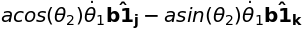

In [3]:
V_01 = (a * B1['i']).dt(B0)
V_01.express(B2)

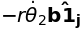

In [4]:
V_12 = (r * B2['k']).dt(B1)
V_12.express(B2)

In [5]:
V_02 = V_01.express(B2) + V_12.express(B2)
V_02.to_matrix(B2)

⎡          0          ⎤
⎢                     ⎥
⎢a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇⎥
⎢                     ⎥
⎣   -a⋅sin(θ₂)⋅θ₁̇    ⎦

**2. Determined $\overrightarrow{\Gamma_{02}(P)}$ using the Bour formula**

In [6]:
# Bour formula:
# V_02_B0 = V_02_B2 + R_02 ^ OM_B2
# G_02 = d(V_02_B0)/dt
# G_02 = d(V_02_B1)/dt_B1 + R_01 ^ V_02_B0

R_01 = B1.ang_vel_in(B0).to_matrix(B0)
R_12 = B2.ang_vel_in(B1).to_matrix(B0)
R_02 = R_01 + R_12  # Using Sympy method: B2.ang_vel_in(B0).to_matrix(B0) 


display(Math('\overrightarrow{V_{02}}\ in \ the \ (2) \ reference \ frame:'))
V_02.to_matrix(B2)
display(Math('\overrightarrow{V_{02}}\ in \ the \ (1) \ reference \ frame:'))
V_02.to_matrix(B1)
G_02_B1 = V_02.express(B1).dt(B1).to_matrix(B0)
display(Math('\overrightarrow{\Gamma_{02}}\ in \ the \ (1) \ reference \ frame:'))
G_02_B1

display(Math('\overrightarrow{V_{02}}\ in \ the \ (0) \ reference \ frame:'))
V_02_B0 = V_02.to_matrix(B0)
V_02_B0

display(Math('\overrightarrow{\Gamma_{02}}\ in \ the \ (0) \ reference \ frame, \ using \ the \ Bour \ formula:'))
G_02 = G_02_B1 + R_01.cross(V_02_B0)  # Derivation reference frame changing
G_02.simplify()

# Using Sympy reference frames methods:
G_02_bis = V_02.express(B0).dt(B0).to_matrix(B0)
test = G_02.simplify() == G_02_bis.simplify()  # Check if both methods give the same result
display(Math('%s: Sympy \ and \ Bour \ formula \ give \ same \ results.' % test))

<IPython.core.display.Math object>

⎡          0          ⎤
⎢                     ⎥
⎢a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇⎥
⎢                     ⎥
⎣   -a⋅sin(θ₂)⋅θ₁̇    ⎦

<IPython.core.display.Math object>

⎡                           0                            ⎤
⎢                                                        ⎥
⎢         2                                              ⎥
⎢    a⋅sin (θ₂)⋅θ₁̇ + (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅cos(θ₂)    ⎥
⎢                                                        ⎥
⎣-a⋅sin(θ₂)⋅cos(θ₂)⋅θ₁̇ + (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅sin(θ₂)⎦

<IPython.core.display.Math object>

⎡     ⎛     2                                                                 
⎢    -⎝a⋅sin (θ₂)⋅θ₁̈ + 2⋅a⋅sin(θ₂)⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ - (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅
⎢                                                                             
⎢    ⎛     2                                                                  
⎢    ⎝a⋅sin (θ₂)⋅θ₁̈ + 2⋅a⋅sin(θ₂)⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ - (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅s
⎢                                                                             
⎢     2                                            2                          
⎣a⋅sin (θ₂)⋅θ₁̇⋅θ₂̇ - a⋅sin(θ₂)⋅cos(θ₂)⋅θ₁̈ - a⋅cos (θ₂)⋅θ₁̇⋅θ₂̇ + (a⋅cos(θ₂)⋅

                                                                  ⎞           
sin(θ₂)⋅θ₂̇ + (-a⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ + a⋅cos(θ₂)⋅θ₁̈ - r⋅θ₂̈)⋅cos(θ₂)⎠⋅sin(θ₁)   
                                                                              
                                                                 ⎞            
in(θ₂)⋅θ₂̇ + (-a⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ + a⋅cos(θ₂)⋅θ₁̈ - 

<IPython.core.display.Math object>

⎡               2                                                  ⎤
⎢- a⋅sin(θ₁)⋅sin (θ₂)⋅θ₁̇ - (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅sin(θ₁)⋅cos(θ₂)⎥
⎢                                                                  ⎥
⎢      2                                                           ⎥
⎢ a⋅sin (θ₂)⋅cos(θ₁)⋅θ₁̇ + (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅cos(θ₁)⋅cos(θ₂) ⎥
⎢                                                                  ⎥
⎣     -a⋅sin(θ₂)⋅cos(θ₂)⋅θ₁̇ + (a⋅cos(θ₂)⋅θ₁̇ - r⋅θ₂̇)⋅sin(θ₂)     ⎦

<IPython.core.display.Math object>

⎡                              2                        2                     
⎢-a⋅sin(θ₁)⋅θ₁̈ - a⋅cos(θ₁)⋅θ₁̇  - r⋅sin(θ₁)⋅sin(θ₂)⋅θ₂̇  + r⋅sin(θ₁)⋅cos(θ₂)⋅
⎢                                                                             
⎢               2                                                             
⎢- a⋅sin(θ₁)⋅θ₁̇  + a⋅cos(θ₁)⋅θ₁̈ + r⋅sin(θ₁)⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + r⋅sin(θ₂)⋅cos(
⎢                                                                             
⎢                                          ⎛                         2⎞       
⎣                                       -r⋅⎝sin(θ₂)⋅θ₂̈ + cos(θ₂)⋅θ₂̇ ⎠       

                                ⎤
θ₂̈ + r⋅cos(θ₁)⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ ⎥
                                ⎥
       2                        ⎥
θ₁)⋅θ₂̇  - r⋅cos(θ₁)⋅cos(θ₂)⋅θ₂̈⎥
                                ⎥
                                ⎥
                                ⎦

<IPython.core.display.Math object>